In [1]:
#
# see https://easy.gems.dkrz.de/Processing/healpix/healpix_cartopy.html
#
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import easygems.healpix as egh

import intake
# for online
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
# for nowake
#cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["JAPAN"]
zd = cat.nicam_gl11(time="PT3H", zoom=6).to_dask()



/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


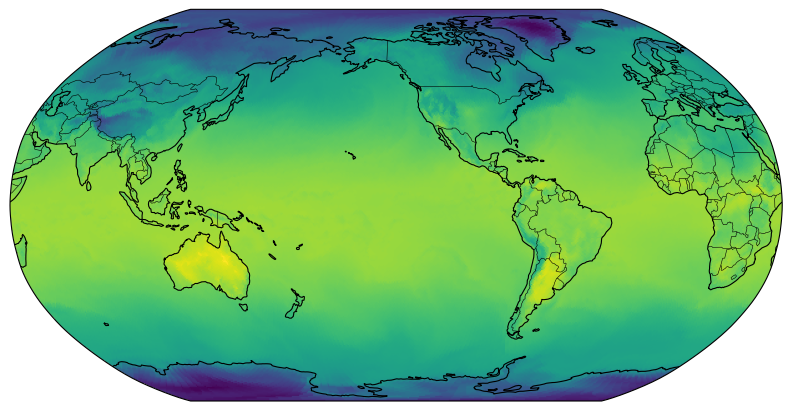

In [2]:
def worldmap(var, **kwargs):
    projection = ccrs.Robinson(central_longitude=-135.5808361)
    fig, ax = plt.subplots(
        figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
    )
    ax.set_global()

    egh.healpix_show(var, ax=ax, **kwargs)
    ax.add_feature(cf.COASTLINE, linewidth=0.8)
    ax.add_feature(cf.BORDERS, linewidth=0.4)

worldmap(zd.tas.isel(time=0))

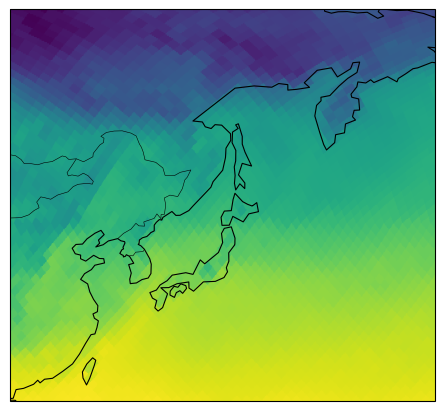

In [3]:
projection = ccrs.Robinson(central_longitude=140)
fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)
ax.set_extent([110., 170., 20., 70.], crs=ccrs.PlateCarree())

egh.healpix_show(zd.tas.isel(time=0), ax=ax)
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)